In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ramazanfratakda","key":"ed1566cc15f2c7491d66fcf38a8f266b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d undersc0re/fake-vs-real-face-classification
!unzip fake-vs-real-face-classification.zip


Dataset URL: https://www.kaggle.com/datasets/undersc0re/fake-vs-real-face-classification
License(s): Attribution 4.0 International (CC BY 4.0)
 93% 201M/215M [00:01<00:00, 128MB/s]
100% 215M/215M [00:01<00:00, 139MB/s]
Archive:  fake-vs-real-face-classification.zip
  inflating: Validation/fake/532.jpg  
  inflating: Validation/fake/533.jpg  
  inflating: Validation/fake/534.jpg  
  inflating: Validation/fake/535.jpg  
  inflating: Validation/fake/536.jpg  
  inflating: Validation/fake/537.jpg  
  inflating: Validation/fake/538.jpg  
  inflating: Validation/fake/539.jpg  
  inflating: Validation/fake/540.jpg  
  inflating: Validation/fake/541.jpg  
  inflating: Validation/fake/542.jpg  
  inflating: Validation/fake/543.jpg  
  inflating: Validation/fake/544.jpg  
  inflating: Validation/fake/545.jpg  
  inflating: Validation/fake/546.jpg  
  inflating: Validation/fake/547.jpg  
  inflating: Validation/fake/548.jpg  
  inflating: Validation/fake/549.jpg  
  inflating: Validation/fake/550

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from glob import glob

from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [ ]:
import os
import cv2  # OpenCV kütüphanesini kullanarak resimleri yüklemek için
import numpy as np

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images

def preprocess_images(images, target_size=(224, 224), grayscale=True, edge_detection=True,contrast_factor=2.0, brightness_factor=0.5):
    processed_images = []
    for img in images:
        img = cv2.resize(img, target_size)  # Boyut
        #if grayscale:
         # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Gri tonlama

          # kenar çıkarma
        #if edge_detection:
         # img = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)  # Sobel kenar belirleme
          #img = cv2.convertScaleAbs(img)  # Pozitif değerler için mutlak değere dönüşüm

        #img = cv2.convertScaleAbs(img, alpha=contrast_factor) # kontrast ayarlama
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img / 255.0  # Normalizasyon
        processed_images.append(img)

    return np.array(processed_images)

train_path = '/content/train'
val_path = '/content/Validation'

train_real_path = os.path.join(train_path, 'real')
train_fake_path = os.path.join(train_path, 'fake')
val_real_path = os.path.join(val_path, 'real')
val_fake_path = os.path.join(val_path, 'fake')

all_real_images = load_images_from_folder(train_real_path) + load_images_from_folder(val_real_path)

all_fake_images = load_images_from_folder(train_fake_path) + load_images_from_folder(val_fake_path)


all_real_images = preprocess_images(all_real_images)
all_fake_images = preprocess_images(all_fake_images)


print(f'Total real images: {len(all_real_images)}')
print(f'Total fake images: {len(all_fake_images)}')

Total real images: 949
Total fake images: 760


In [ ]:
y_test = np.concatenate([np.ones(len(all_real_images)), np.zeros(len(all_fake_images))])

X_test = np.concatenate([all_real_images, all_fake_images])

In [ ]:

import matplotlib.pyplot as plt

def show_image_grid(images, title):
    plt.figure(figsize=(10, 10))
    for i in range(min(len(images), 9)):  # İlk 9 resmi göstermek için
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()





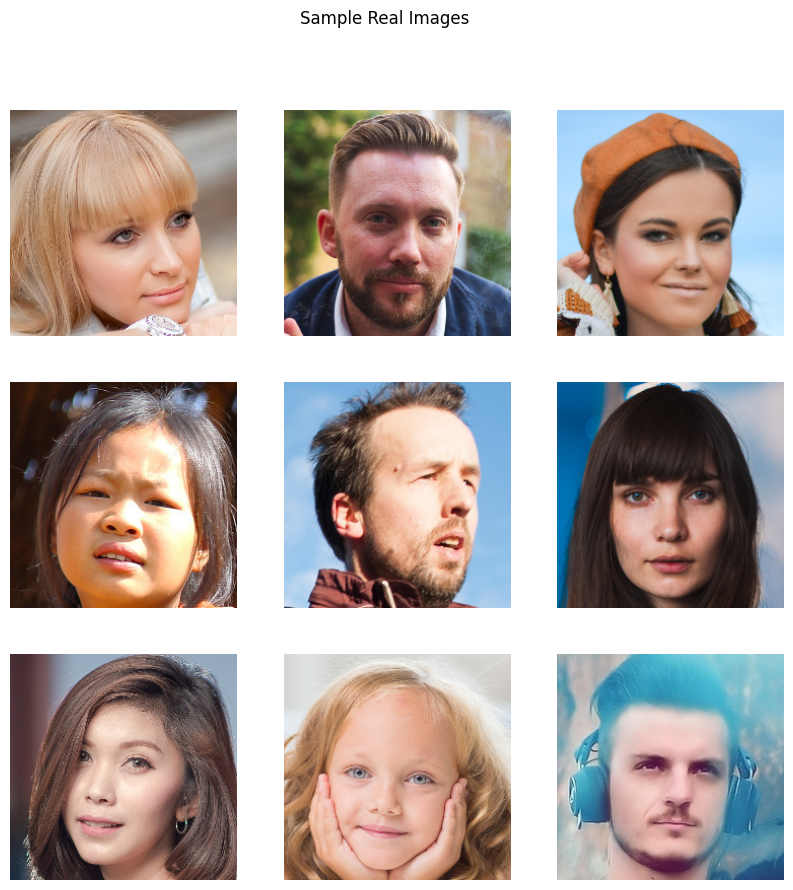

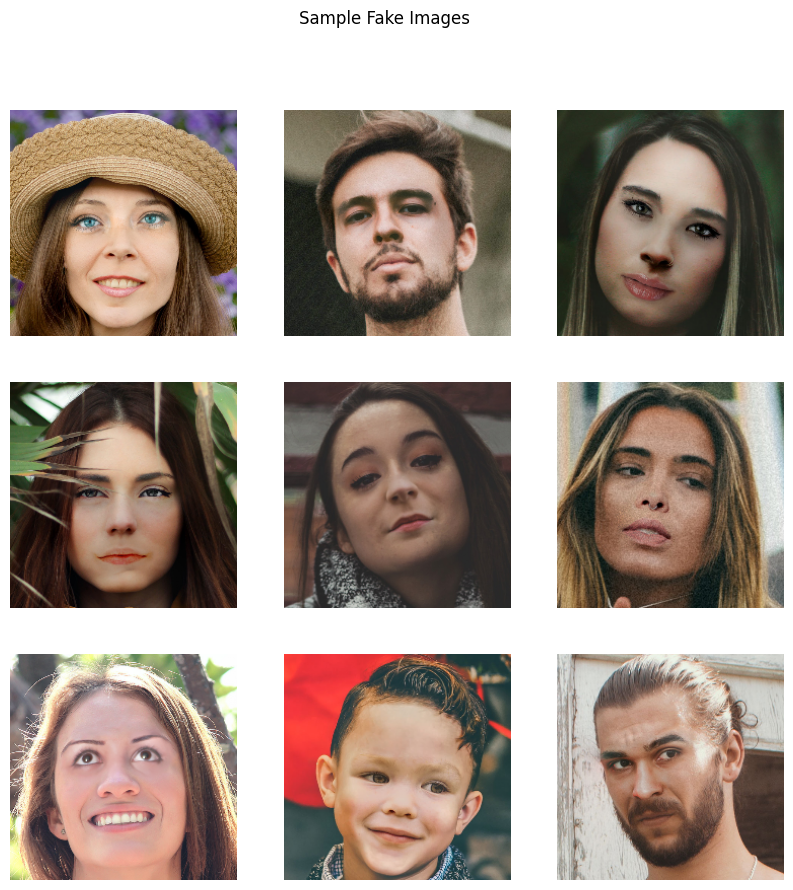

In [ ]:
# Real resimlerden örnekleri göster
show_image_grid(all_real_images, 'Sample Real Images')

# Fake resimlerden örnekleri göster
show_image_grid(all_fake_images, 'Sample Fake Images')

# Hard Dataset ile eğitilmiş modeller ile tahmin

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
small_loaded_model = keras.models.load_model('/content/gdrive/My Drive/small_model_hard.h5')

54/54 [==============================] - 6s 36ms/step - loss: 5.4978 - accuracy: 0.5483
Test Loss: 5.4977707862854
Test Accuracy: 0.5482738614082336
54/54 [==============================] - 2s 19ms/step


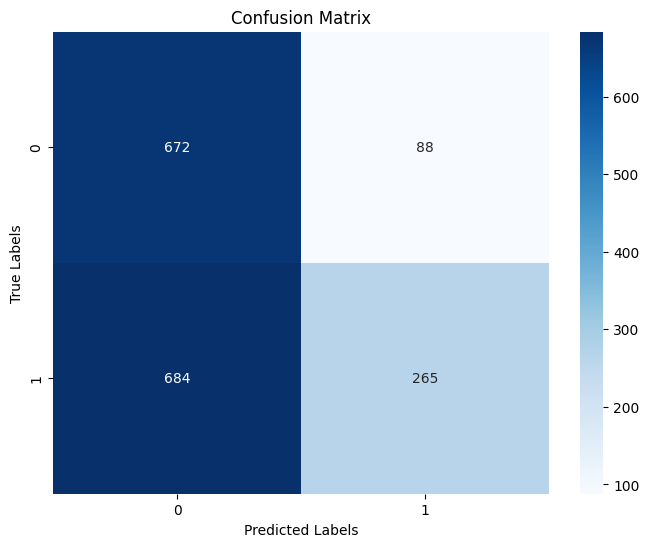

In [ ]:
test_loss, test_accuracy = small_loaded_model.evaluate(X_test,y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini al
y_pred = small_loaded_model.predict(X_test)
y_pred = (y_pred > 0.5)  # Sınıfları binary hale getir

# Confusion Matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

shuffle

In [ ]:
shuffle_loaded_model = keras.models.load_model('/content/gdrive/My Drive/shuffle_model_hard.h5')

54/54 [==============================] - 5s 51ms/step - loss: 1.6109 - accuracy: 0.5102
Test Loss: 1.6109148263931274
Test Accuracy: 0.5102398991584778
54/54 [==============================] - 3s 34ms/step


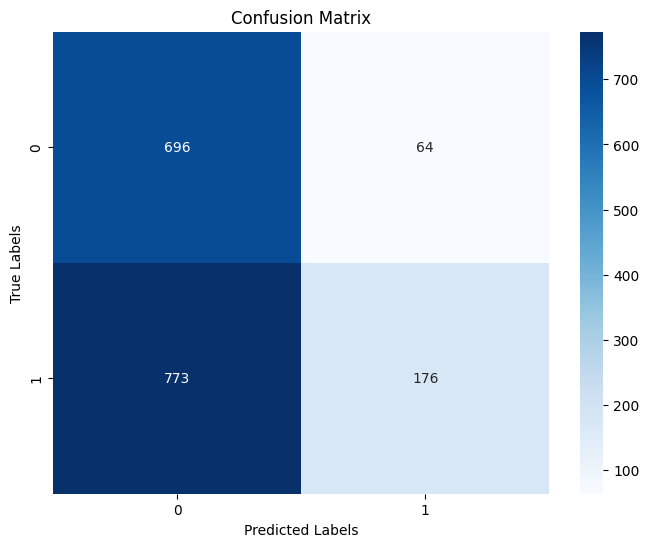

In [ ]:
test_loss, test_accuracy = shuffle_loaded_model.evaluate(X_test,y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini al
y_pred = shuffle_loaded_model.predict(X_test)
y_pred = (y_pred > 0.5)  # Sınıfları binary hale getir

# Confusion Matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()